In [53]:
import numpy as np
import os
from skimage.io import imread
from skimage.transform import resize
from skimage.color import gray2rgb
from tensorflow import keras
import pandas as pd
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import random
from model import ELM
from keras import utils as np_utils

In [54]:
dim=(256,256)
imageShape = (dim[0],dim[1],3)
numClasses = 2
batchSize = 10
epochs = 1
folderWithPics='twitter'
dirs=os.listdir('./'+folderWithPics)
clsLabels=pd.read_csv('./'+folderWithPics+'/groundTruthLabel.txt',delimiter='\t')
clsLabels.index=clsLabels.index+1
subDirPath=[('./'+folderWithPics+'/'+di) for di in dirs if('txt' not in di)]
allImagesTrainPath=[(si+'/'+ii) for si in subDirPath[:-1] for ii in os.listdir(si) if('jpg' in ii)]
allImagesTestPath=[(si+'/'+ii) for si in [subDirPath[-1]] for ii in os.listdir(si) if('jpg' in ii)]

In [55]:
def formImageSet(allImagesFoldrPath,dim,clsLabels):
    x_imageSet=np.empty((len(allImagesFoldrPath),dim[0],dim[1],3))
    y_Set=np.empty((len(allImagesFoldrPath),1))
    for im in range(len(allImagesFoldrPath)):
        readImage=imread(allImagesFoldrPath[im])
        
        imNum=int(allImagesFoldrPath[im].split('/')[-1].split('.')[0])
        actualClass=clsLabels.loc[imNum][1]
        
        if (actualClass=='positive'):
            y_Set[im]=1
        else:
            y_Set[im]=0
            
        if (len(readImage.shape)>=3):
            if readImage.shape[2]>3:
                readImage=readImage[:,:,:3]            
        else:
            print(im,readImage.shape)
            readImage=gray2rgb(readImage)            
        readImage=resize(readImage,dim)
        x_imageSet[im]=readImage
    return x_imageSet,y_Set

In [56]:
num_classes = 10
num_hidden_layers = 512
input_length = 28**2

In [61]:
def prepareDataSet():
    xTrainImSet,yTrainSet=formImageSet(allImagesTrainPath,dim,clsLabels)
    xTestImSet,yTestSet=formImageSet(allImagesTestPath,dim,clsLabels)
    
    xTrainImSet= xTrainImSet.astype('float32')
    xTestImSet= xTestImSet.astype('float32')
    xTrainImSet /= 255.0
    xTestImSet /= 255.0

    yTrainSet= keras.utils.to_categorical(yTrainSet, numClasses)
    yTestSet= keras.utils.to_categorical(yTestSet, numClasses)
    
    print('Train Dataset size: ', xTrainImSet.shape[0])
    print('Test Dataset size: ', yTestSet.shape[0])
    
    return (xTrainImSet,yTrainSet), (xTestImSet,yTestSet)

In [62]:
print('Prepare data set...')
(xTrainImSet,yTrainSet), (xTestImSet,yTestSet) = prepareDataSet()

Prepare data set...
245 (277, 500)
Train Dataset size:  482
Test Dataset size:  121


In [65]:
model = ELM(
    input_length,
    num_hidden_layers,
    numClasses
)

Bias shape: (512,)
W shape: (784, 512)
Beta shape: (512, 2)


In [69]:
# Train
model.fit(xTrainImSet, yTrainSet, display_time=True)
train_loss, train_acc = model.evaluate(xTrainImSet, yTrainSet)
print('train loss: %f' % train_loss)
print('train acc: %f' % train_acc)

ValueError: shapes (482,256,256,3) and (784,512) not aligned: 3 (dim 3) != 784 (dim 0)

In [68]:
# Validation
val_loss, val_acc = model.evaluate(x_test, y_test)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

ValueError: operands could not be broadcast together with shapes (10000,) (10000,2) 

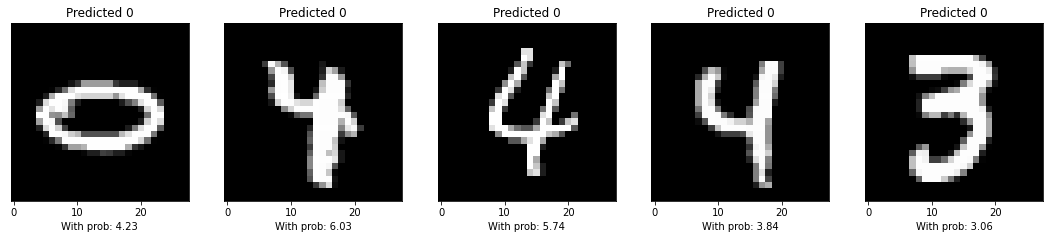

In [59]:
# Predictions
test_data = x_test[np.random.choice(len(x_test), size=5, replace=False)]
predictions = model(test_data)

fig, axs = plt.subplots(1, 5)
fig.set_size_inches(18.5, 10.5)
for idx, image in enumerate(test_data):
    image = np.array(image, dtype='float')
    pixels = image.reshape((28, 28))
    axs[idx].imshow(pixels, cmap='gray')
    axs[idx].axes.get_yaxis().set_visible(False)
    axs[idx].title.set_text(f'Predicted {np.argmax(predictions[idx])}')
    axs[idx].set_xlabel(f'With prob: {str(round(np.max(predictions[idx]), 2))}')
    
    
plt.show()